# 运算和颜色空间简介

图像的算术运算和按位运算在图像处理中有很多应用，例如图像的算术运算在图像增强中普遍应用，其可对图片进行增加亮度、减少亮度、增强对比度等操作以满足特定的图像处理需求，还可以通过将两幅图片进行算术运算以达到图像融合的效果。图像的按位运算在图像分割、目标检测和识别、模式识别中得到广泛的应用，例如通过按位运算操作，可以提取图片中真正感兴趣的区域而忽略其他区域，在图像分割中可以用按位运算将前景物体从图片中分割开来。下图是图像运算的一个例子。



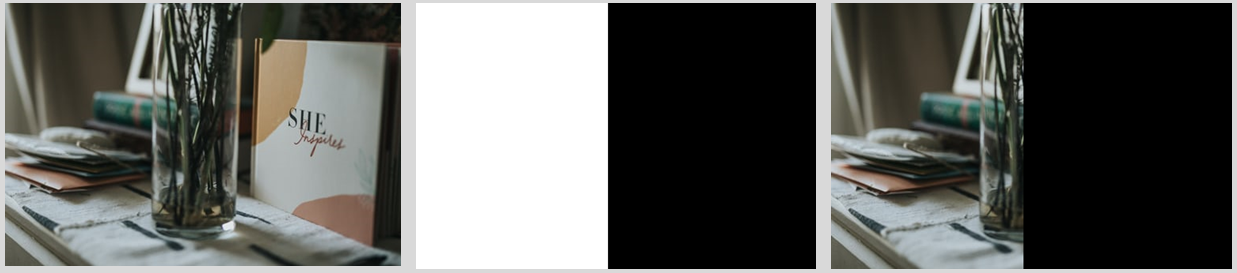

颜色空间是对色彩的说明，RGB 颜色空间是在处理图像时常常遇到的，但是除了 RGB 颜色空间人们还创建了其他很多的颜色空间，每种颜色空间都有各自的优缺点，有时候我们需要将图片从一种颜色空间转换到另一种颜色空间进行处理。下面我们将通过几个例子来学习这些方法。



In [20]:
%run args.py --image images/cup.jpg --image images/pug.jpg

In [21]:
import cv2
import numpy as np

In [22]:
M = image1.shape
# 需要一个矩阵，形状和单张图片一样，再用这个矩阵和图片运算

In [23]:
x = np.ones(M,dtype='uint8')
#第二个参数 dtype = "uint8" 表示每个元素数据类型都是 8 位无符号整型
# （因为像素值的范围是 0 到 255，而 uint8 的范围也是 0 到 255）。

In [24]:
x = x*150

In [25]:
sums = cv2.add(image1,x)
cv2.imwrite('sum.jpg',sums)
# 因为值编的更大，所以看起开更亮

True

In [26]:
sub = cv2.subtract(image1,x)
cv2.imwrite('sub.jpg',sub)
# 相减，看起来编的更加的暗

True

In [ ]:
mul = cv2.multiply(image1,x)
cv2.imwrite('mul.jpg',mul)
# 空白的，相乘后都是255
mul

In [ ]:
# 除法
div = cv2.divide(image1,x)
cv2.imwrite('div.jpg',div)
# 全黑，因为都是0

True

 位无符号整数表示 0 到 255，OpenCV 的算术运算函数是饱和运算，当运算结果大于 255 时函数输出 255，当运算结果小于 0 时函数输出 0。这里需要同 NumPy 的算术运算区分开，NumPy 的运算是取模运算，即当运算结果大于 255 时则最后得到的是运算结果对 256 取模。

In [31]:
# 对比一下
x,y = np.uint8([150]),np.uint8([160])
c1 = cv2.add(x,y)
c2 = cv2.subtract(x,y)

n1 = np.add(x,y)
n2 = np.subtract(x,y)
c1,c1,n1,n2


(array([[255]], dtype=uint8),
 array([[255]], dtype=uint8),
 array([54], dtype=uint8),
 array([246], dtype=uint8))

对两张照片进行算术运算的操作和上面基本一样，只需为运算函数提供两张尺寸和通道数相同的图片即可。下面一行代码我们使用前面学习过的 cv2.resize 函数将第二张图片的宽和高调整到和第一张图片相同的大小。

In [32]:
image2 = cv2.resize(image2,(image1.shape[1],image1.shape[0]),
                    interpolation = cv2.INTER_CUBIC)

In [33]:
sums = cv2.add(image1, image2)
cv2.imwrite("sums.jpg", sums)

True

In [35]:
# 减法
subs = cv2.subtract(image1,image2)
cv2.imwrite('subs.jpg',subs)

True

In [36]:
# 其他不用写了，一个道理

# 按位运算

OpenCV 的位运算是对像素值的二进制位进行的运算，有 4 种按位运算： and、or、xor、not。
- and 运算是当两个像素值都大于 0 时为真，
- or 运算是当两个像素值有一个大于 0 时为真，x
- or 运算是当两个像素值有一个大于 0 但不同时都大于 0 则为真。
- not 则是一个取反的运算。

In [38]:
%run args.py --image images/cup.jpg --image images/rectangle.jpg

In [40]:
a = np.array([20,40,167],dtype = np.uint8)
b = np.array([80,48,240],dtype = np.uint8)

In [41]:
cv2.bitwise_and(a,b)

array([[ 16],
       [ 32],
       [160]], dtype=uint8)

前面我们提到过 OpenCV 的位运算是对像素值的二进制位进行的运算，a 中的 20 的二进制是 00010100，b 中的 80 的二进制是 01010000，对两个数进行 and 计算得到 00010000 其对应十进制就是 16。同理 a 中的 40 和 b 中的 48 的 and 运算结果是 32， a 中的167 和 b 中的 240 的 and 运算结果是 160

In [ ]:
print(cv2.bitwise_or(a, b))# 或运算
print(cv2.bitwise_xor(a,b))# 抑或运算
print(cv2.bitwise_not(a)) # 非运算

[[ 84]
 [ 56]
 [247]]
[[68]
 [24]
 [87]]
[[235]
 [215]
 [ 88]]


In [43]:
# 首先把两个图片调到相同的大小
image2 = cv2.resize(image2,(image1.shape[1],image1.shape[0]),
                    interpolation = cv2.INTER_CUBIC)

In [ ]:
i_and = cv2.bitwise_and(image1,image2)
cv2.imwrite('i_and.jpg',i_and)
# 黑色遮挡，因为黑色是0，按位与后还是0，白色是1

True

In [46]:
i_or = cv2.bitwise_or(image1, image2)
cv2.imwrite("i_or.jpg", i_or)
# 白色遮挡

True

In [ ]:
i_xor = cv2.bitwise_xor(image1, image2)
cv2.imwrite("i_xor.jpg", i_xor)
# 没有遮挡，但是改变了颜色

True

In [48]:
i_not = cv2.bitwise_not(image1)
cv2.imwrite("i_not.jpg", i_not)

True

**掩膜**

掩膜（mask）是图像按位计算的一种应用，其目的是只显示出图片中我们感兴趣的区域并遮盖其他部分。现在我们来看一下掩膜的具体操作。掩膜的应用比较简单，下面代码中我们用 np.zeros 创建一张黑色图片，因为这张图片的尺寸要和进行掩膜操作的原图片的尺寸一样，所以我们使用 shape 方法获取 image1 的宽和高，然后将这两个值作为参数传递给函数。然后将我们感兴趣的区域的像素值赋值为 255，这里我们选取的区域 mask[100:300, 200:300] 也就是感兴趣区域为白色。

In [ ]:
mask = np.zeros(image1.shape[0:2],np.uint8)
mask[100:300,200:300] = 255


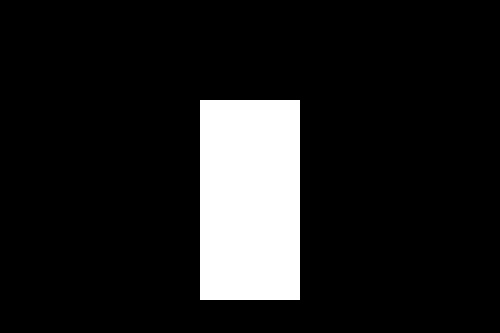

使用 cv2.bitwise_and 函数进行掩膜操作，函数第一个和第二个参数相同，都是我们的原始图片 image1 ，第三个参数 mask 就是我们刚才创建的掩膜图片。该函数会把原图片中对应于掩膜图片的白色区域显示出来，其他区域会被黑色遮盖。下图左边是我们的原图片，右边是提取出我们感兴趣的区域。

In [51]:
imagemask = cv2.bitwise_and(image1, image1, mask = mask)
cv2.imwrite("imagemask.jpg", imagemask)

True

# 颜色空间

除了以前我们了解的 RGB 颜色空间，还有很多其他的颜色空间，例如 HSV，LAB 等，颜色空间是一种描述色彩的模型，其作用是在不同的标准下对不同颜色的说明。OpenCV 中有上百种颜色空间转换方法，这里我们将简单介绍常用的颜色空间转换方法。

我们用 cv2.cvtColor 方法将图片转换为灰度图。函数的第一个参数 image1 是要被转换为灰度图的图片。第二个参数 cv2.COLOR_BGR2GRAY 表示颜色空间转换类型，这里表示将图片从 RGB 彩色图片转换为灰度图。

In [ ]:
# 灰度图
grayimage = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
cv2.imwrite('grayimage.jpg',grayimage)

True

In [ ]:
# HSV图
hsvimage = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
cv2.imwrite("HSVimage.jpg", hsvimage)
# HSV是一个三维颜色空间，包含色调（Hue）、饱和度（Saturation）和明度（Value）三个维度。
# 色调表示颜色的基本属性，饱和度决定颜色的强度或纯度，明度则指导颜色的亮度‌


True